In [1]:
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
df = pd.read_csv('\\RICARDO/ML/Homework_11/DJIA.csv')
df
stocks = df.pivot('Date', 'Name')
print(stocks.head(10))
print(list(stocks.columns.values))

             Open                                                          \
Name         AABA   AAPL   AMZN    AXP     BA    CAT   CSCO    CVX    DIS   
Date                                                                        
2006-01-03  39.69  10.34  47.47  51.70  70.40  57.87  17.21  57.25  24.08   
2006-01-04  41.22  10.73  47.48  52.44  70.08  57.95  17.48  59.08  24.50   
2006-01-05  40.93  10.69  47.16  51.90  70.55  59.02  17.94  58.68  24.13   
2006-01-06  42.88  10.75  47.97  52.64  70.34  59.47  18.51  58.95  24.65   
2006-01-09  43.10  10.96  46.55  52.82  69.28  60.45  18.97  59.49  24.85   
2006-01-10  42.96  10.89  46.41  53.58  68.80  61.35  18.87  58.76  25.02   
2006-01-11  42.19  11.98  45.65  53.70  69.97  60.87  18.98  59.22  25.38   
2006-01-12  41.92  12.14  44.79  53.58  70.25  61.23  19.27  60.00  25.65   
2006-01-13  41.00  12.14  44.48  53.70  69.64  62.02  19.13  59.89  25.61   
2006-01-17  39.09  12.24  43.95  53.08  69.07  61.69  18.70  60.90  25.83   

In [3]:
stocks[('High', 'MMM')].head()

Date
2006-01-03    79.35
2006-01-04    79.49
2006-01-05    78.65
2006-01-06    78.90
2006-01-09    79.83
Name: (High, MMM), dtype: float64

In [4]:
# Create variables for lead in 7 days:
target  = stocks[('High', 'MMM')].shift(-7)
target.head(10)
features =  stocks.values
target = target.values

In [5]:
np.argwhere(np.isnan(target))

array([[3013],
       [3014],
       [3015],
       [3016],
       [3017],
       [3018],
       [3019]], dtype=int64)

In [6]:
np.argwhere(np.isnan(features))

array([[ 907,   20],
       [ 907,   51],
       [ 907,   82],
       [ 907,  113],
       [ 907,  144],
       [1068,    0],
       [1068,    1],
       [1068,    2],
       [1068,    6],
       [1068,   10],
       [1068,   14],
       [1068,   21],
       [1068,   31],
       [1068,   32],
       [1068,   33],
       [1068,   37],
       [1068,   41],
       [1068,   45],
       [1068,   52],
       [1068,   62],
       [1068,   63],
       [1068,   64],
       [1068,   68],
       [1068,   72],
       [1068,   76],
       [1068,   83],
       [1068,   93],
       [1068,   94],
       [1068,   95],
       [1068,   99],
       [1068,  103],
       [1068,  107],
       [1068,  114],
       [1068,  124],
       [1068,  125],
       [1068,  126],
       [1068,  130],
       [1068,  134],
       [1068,  138],
       [1068,  145],
       [1657,    8],
       [1657,   39],
       [1657,   70],
       [2913,    3],
       [2913,    4],
       [2913,    5],
       [2913,    7],
       [2913,

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X_imp = imp.fit_transform(features)   

In [8]:
# Normilize data, drop NaN obs
X_imp = X_imp[:-8,]
target = target[:-8,]
import sklearn.preprocessing
X_norm = sklearn.preprocessing.normalize(X_imp)

In [9]:
X_norm

array([[1.62175383e-07, 4.22497723e-08, 1.93964864e-07, ...,
        5.27255911e-02, 9.56704008e-02, 9.75471243e-02],
       [1.99870345e-07, 5.20283551e-08, 2.30224259e-07, ...,
        1.50336732e-01, 6.83239463e-02, 9.25484067e-02],
       [2.12867682e-07, 5.55962746e-08, 2.45268504e-07, ...,
        1.07468795e-01, 1.07963909e-01, 8.92380017e-02],
       ...,
       [8.85704535e-07, 2.16282524e-06, 1.45991958e-05, ...,
        2.35545080e-01, 1.17748133e-01, 1.19085785e-01],
       [4.47477571e-07, 1.12033930e-06, 7.60763490e-06, ...,
        1.86705567e-01, 1.04160570e-01, 1.71521231e-01],
       [7.44960641e-07, 1.84687719e-06, 1.25396075e-05, ...,
        1.67645957e-01, 8.41110199e-02, 9.88859318e-02]])

In [10]:
target.shape

(3012,)

# Problem 1. 
Scale the data. Use 10000 iterations with 30 steps to predict target using RNN with 3 neural layers with 100 neurons each [100,100,100].Use learning_rate = 0.001.

a. Generate predicted price from the model. 
b. Calculate expected profit from 7 day investement
c. Find 10 days with best expected rate of 7 day investement
d. calculate expected and observed profit for these 10 best investement days
e. Find average expected and realized profit for all days in the data

In [11]:
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()


n_steps = 30
n_inputs = len(stocks.columns)
n_neurons = 100
n_outputs = 1
learning_rate = 0.001
batch_size = 1
n_iterations = 10000

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

print(X)
print(y)

Tensor("Placeholder:0", shape=(?, 30, 155), dtype=float32)
Tensor("Placeholder_1:0", shape=(?,), dtype=int32)


In [12]:
# 3 Layers
n_layers = 3

layers = [tf.contrib.rnn.BasicRNNCell(num_units=n_neurons,
                                      activation=tf.nn.relu)
          for layer in range(n_layers)]

multi_layer_cell = tf.contrib.rnn.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

print(states)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
(<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 100) dtype=float32>, <tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 100) dtype=float32>)


In [13]:
init = tf.global_variables_initializer()

In [14]:
X_batch = np.random.rand(3, n_steps, n_inputs)

In [15]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X: X_batch})

In [16]:
outputs_val.shape

(3, 30, 100)

In [17]:
t_min, t_max = 0, 30
resolution = 0.1
# create time series
def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)
# Randomly draw a batch with a lenght of n_steps.
def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [18]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))

n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

Text(0.5, 0, 'Time')

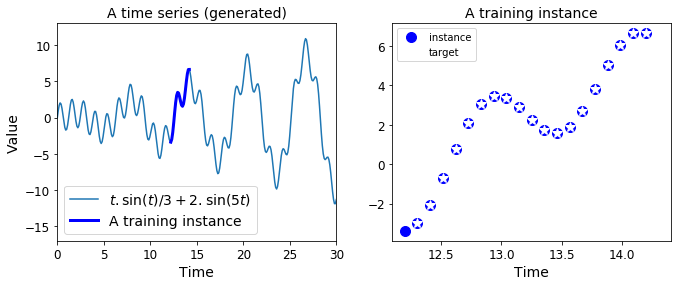

In [19]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plt.title("A time series (generated)", fontsize=14)
plt.plot(t, time_series(t), label=r"$t . \sin(t) / 3 + 2 . \sin(5t)$")
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "b-", linewidth=3, label="A training instance")
plt.legend(loc="lower left", fontsize=14)
plt.axis([0, 30, -17, 13])
plt.xlabel("Time")
plt.ylabel("Value")

plt.subplot(122)
plt.title("A training instance", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.legend(loc="upper left")
plt.xlabel("Time")